## Pandas Grouping and Aggregation

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("thanksgiving-2015-poll-data.csv", encoding="Latin-1")

In [4]:
# Print top 5 rows from data
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [5]:
# what is the size?
data.shape

(1058, 65)

#### What are unique values of "Do you celebrate Thanksgiving?" column?

In [6]:
data["Do you celebrate Thanksgiving?"].unique()

array(['Yes', 'No'], dtype=object)

#### View all column names (top 5)

In [7]:
data.columns[:5]

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?'],
      dtype='object')

### Apply function to Series

#### How many male, female and NaN in "What is your gender?" column

In [8]:
data.groupby(["What is your gender?"],dropna=False).size()

What is your gender?
Female    544
Male      481
NaN        33
dtype: int64

In [9]:
import math
def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

#### Apply gender_code() to What is tour gender? column

In [10]:
#for i in range(0,1058):
    #gender_string = data.loc[i,"What is your gender?"]
    #gender_code(gender_string)

In [11]:
data['gender'] = data['What is your gender?'].apply(gender_code)
data['gender']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1053    1.0
1054    1.0
1055    0.0
1056    NaN
1057    NaN
Name: gender, Length: 1058, dtype: float64

#### Count male and females as 0s and 1s. How many in "gender" column?

In [36]:
data.groupby(["gender"],dropna=False).size().sort_values(ascending=False)

gender
1.0    544
0.0    481
NaN     33
dtype: int64

### Applying functions to DataFrames

In [13]:
data.apply(lambda x: x.dtype)[:5]

RespondentID                                                                              int64
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

### DATA CLEANING

#### We need to convert string values representing income in "How much total combined money did all members of your HOUSEHOLD earn last year" column into numeric values. Check the unique values first

In [15]:
data['How much total combined money did all members of your HOUSEHOLD earn last year?'].unique()

array(['$75,000 to $99,999', '$50,000 to $74,999', '$0 to $9,999',
       '$200,000 and up', '$100,000 to $124,999', '$25,000 to $49,999',
       'Prefer not to answer', '$10,000 to $24,999',
       '$150,000 to $174,999', '$175,000 to $199,999',
       '$125,000 to $149,999', nan], dtype=object)

In [16]:
data.groupby('How much total combined money did all members of your HOUSEHOLD earn last year?',dropna=False).size().sort_values(ascending=False)

How much total combined money did all members of your HOUSEHOLD earn last year?
$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
dtype: int64

In [17]:
import numpy as np

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
        
    value = value.replace("$", "").replace(",", "")
    income_high, income_low = value.split(" to ")
    
    return(int(income_high) + int(income_low)) / 2

#### Now apply this function to the "How much total combined money did all members of your HOUSEHOLD earn last year?" column and put it in new column "income"

In [18]:
#for i in range(0,1058):
    #value = data.loc[i,"How much total combined money did all members of your HOUSEHOLD earn last year?"]
    #clean_income(value)

In [19]:
data['income'] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)

In [22]:
data['income'].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

### Grouping Data with Pandas

#### Who earn more income?

#### Check unique values in column, "What type of cranberry saucedo you typically have?" first.

In [31]:
data['What type of cranberry saucedo you typically have?'].unique()

array(['None', 'Other (please specify)', 'Homemade', 'Canned', nan],
      dtype=object)

In [35]:
data.groupby('What type of cranberry saucedo you typically have?').size().sort_values(ascending=False)

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

#### Create a datafrme by filtering values "Homemade"

In [40]:
homemade_df = data[data['What type of cranberry saucedo you typically have?']=='Homemade']
homemade_df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,0.0,4999.5
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,0.0,200000.0
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific,0.0,4999.5
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain,0.0,NaN
13,4337878450,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Middle Atlantic,0.0,4999.5


#### Create another datafrme by filtering values "Canned"

In [41]:
canned_df = data[data['What type of cranberry saucedo you typically have?']=='Canned']
canned_df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific,0.0,112499.5
6,4337924420,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,No,Rural,18 - 29,Male,"$25,000 to $49,999",East North Central,0.0,37499.5
8,4337914977,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$75,000 to $99,999",Middle Atlantic,0.0,87499.5
11,4337893416,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Suburban,30 - 44,Male,"$25,000 to $49,999",Middle Atlantic,0.0,37499.5
12,4337888291,Yes,Ham/Pork,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",East North Central,0.0,4999.5


#### Now print mean income of homemade_df and canned_df for these two groups of people

In [44]:
homemade_df['income'].mean()

94878.1072874494

In [43]:
canned_df['income'].mean()

83823.40340909091

### Use groupby() and aggregate() to find out "Who earn more income?"

#### Split dataset based on "What type of cranberry saucedo you typically have?" column automatically into groups based on unique values

In [48]:
grouped = data.groupby('What type of cranberry saucedo you typically have?')
grouped

#### List out all groups that are created by groupby()

In [85]:
grouped.groups

{'Canned': [4, 6, 8, 11, 12, 15, 18, 19, 26, 27, 38, 43, 48, 53, 58, 59, 60, 68, 69, 71, 74, 76, 79, 80, 86, 87, 89, 90, 91, 97, 103, 106, 107, 109, 115, 116, 118, 119, 123, 127, 129, 130, 132, 135, 136, 137, 140, 141, 143, 144, 145, 150, 153, 155, 156, 157, 158, 159, 161, 162, 163, 166, 167, 168, 169, 173, 179, 180, 181, 182, 184, 186, 190, 192, 193, 195, 198, 199, 200, 204, 205, 207, 209, 210, 211, 212, 213, 215, 217, 218, 220, 222, 224, 226, 229, 230, 231, 239, 243, 245, ...], 'Homemade': [2, 3, 5, 7, 13, 14, 16, 20, 21, 23, 25, 28, 30, 32, 33, 37, 39, 42, 44, 46, 52, 54, 56, 57, 62, 64, 66, 70, 82, 83, 85, 88, 93, 94, 96, 98, 101, 102, 108, 110, 111, 112, 114, 120, 122, 128, 134, 138, 139, 152, 165, 171, 172, 174, 175, 176, 177, 178, 183, 188, 189, 194, 201, 202, 203, 208, 219, 223, 225, 232, 234, 235, 236, 238, 241, 242, 244, 246, 248, 254, 255, 256, 259, 261, 262, 263, 264, 268, 281, 285, 286, 287, 290, 291, 292, 295, 298, 300, 302, 303, ...], 'None': [0, 17, 24, 29, 34, 36, 40, 

In [86]:
grouped.indices

{'Canned': array([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,   38,
          43,   48,   53,   58,   59,   60,   68,   69,   71,   74,   76,
          79,   80,   86,   87,   89,   90,   91,   97,  103,  106,  107,
         109,  115,  116,  118,  119,  123,  127,  129,  130,  132,  135,
         136,  137,  140,  141,  143,  144,  145,  150,  153,  155,  156,
         157,  158,  159,  161,  162,  163,  166,  167,  168,  169,  173,
         179,  180,  181,  182,  184,  186,  190,  192,  193,  195,  198,
         199,  200,  204,  205,  207,  209,  210,  211,  212,  213,  215,
         217,  218,  220,  222,  224,  226,  229,  230,  231,  239,  243,
         245,  247,  250,  251,  253,  257,  258,  260,  266,  267,  269,
         270,  271,  272,  273,  276,  277,  278,  279,  280,  282,  283,
         284,  288,  289,  293,  294,  296,  297,  304,  305,  307,  308,
         309,  310,  315,  317,  318,  320,  322,  325,  326,  330,  334,
         335,  339,  340,  3

In [87]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [88]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [89]:
grouped['income']

In [91]:
grouped['income'].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: income, dtype: int64

### Aggregating values in groups

#### Now, find out average income

In [104]:
grouped['income'].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

#### If you want to consider all numberic attributes and find the mean for each group for every column in data, you can do as below.

In [106]:
grouped.agg(np.mean)

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,83823.403409
Homemade,4.336792e+09,0.533101,94878.107287
None,4.336765e+09,0.517483,78886.084034
Other (please specify),4.336763e+09,0.640000,86629.978261


### Plotting the results of aggregation

#### What is the average income of each category?

<AxesSubplot:xlabel='What type of cranberry saucedo you typically have?'>

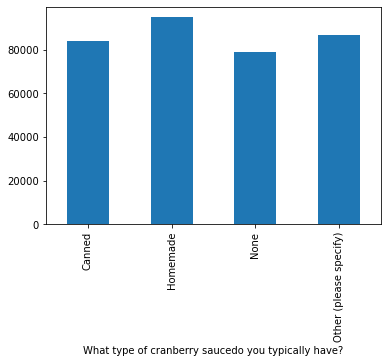

In [107]:
sauce = grouped.agg(np.mean)
sauce["income"].plot(kind="bar")

### Aggregating with multiple columns

#### Find the average income of people who eat Homemade cranberry sauce and Tofurkey

In [111]:
grouped = data.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.642857   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

### Aggregating with multiple functions

#### Find sum, mean and standard deviation of each group in the income column of grouped dataframe

In [112]:
grouped["income"].agg([np.mean, np.sum, np.std]).head(10)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
                                                   Tofurkey                                            100713.857143   
                                                   Turkey                                               85242.682045   
Homemade                                           Chicken                                              19999.500000   
                                                   Ham/Pork                                             96874.625000   
                                                   I don't know                                                  NaN   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404998.0   
                                                   Ham/Pork                                             1084993.5   
                                                   I don't know                                            4999.5   
                                                   Other (please specify)                                372496.5   
                                                   Roast beef                                            127497.5   
                                                   Tofurkey                                              704997.0   
                                                   Turkey                                              34182315.5   
Homemade                                           Chicken                                                59998.5   
                                                   Ham/Pork                                              387498.5   
                                                   I don't know                                               0.0   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.481062  
                                                   Ham/Pork                                            56645.063944  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538  
                                                   Tofurkey                                            61351.484439  
                                                   Turkey                                              55687.436102  
Homemade                                           Chicken                                             16393.596311  
                                                   Ham/Pork                           

#### Find the number of people who live in each area type (Rural, Suburban, etc) who eat different kinds of main dishes for Thanksgiving

In [113]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x: x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        Tofurkey                    3
                                        I don't know                3
                                        Turducken                   2
                                        Chicken                     2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           